## Purchase Prediction

![title](pipeline.png)

An overall pineline for data analysis, including:
1. Data pre-processing
2. Feature engineering
3. Model selection(LR, RandomForest)
4. Cross-validation for parameter searching
5. Feature selection
6. learning curve & Roc curve
7. confusion matrix
6. Imbalanced data learning
7. Predict & submission

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#read training dataset with Pandas
train = pd.read_csv("ads_train.csv")
test  = pd.read_csv('ads_test.csv')

In [190]:
#how the data looks like
print('Feature names: \n',train.columns)
train.head(3)

Feature names: 
 Index(['isbuyer', 'buy_freq', 'visit_freq', 'buy_interval', 'sv_interval',
       'expected_time_buy', 'expected_time_visit', 'last_buy', 'last_visit',
       'multiple_buy', 'multiple_visit', 'uniq_urls', 'num_checkins', 'y_buy'],
      dtype='object')


,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
0,0,NaN,1,0.0,0.0,0.0,0.0000,106,106,0,0,169,2130,0
1,0,NaN,1,0.0,0.0,0.0,0.0000,6,6,0,0,150,539,0
2,0,NaN,2,0.0,0.5,0.0,-101.1493,101,101,0,1,103,362,0


In [191]:
train.describe()  

,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
count,38209.000000,1620.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000
mean,0.042398,1.239506,1.868199,0.197411,5.862179,-0.174376,-10.136685,64.657384,64.657384,0.005967,0.277526,86.594624,723.834515,0.004502
std,0.201499,0.840259,2.996675,3.855662,17.726455,4.784059,31.796845,53.453475,53.453475,0.077018,0.447784,61.941089,1286.380572,0.066943
min,0.000000,1.000000,0.000000,0.000000,0.000000,-181.923800,-187.615600,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,0.000000,0.000000,30.000000,127.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,50.000000,50.000000,0.000000,0.000000,75.000000,319.000000,0.000000
75%,0.000000,1.000000,2.000000,0.000000,0.125000,0.000000,0.000000,105.000000,105.000000,0.000000,1.000000,155.000000,803.000000,0.000000
max,1.000000,15.000000,84.000000,174.625000,184.916700,84.285710,91.401920,188.000000,188.000000,1.000000,1.000000,206.000000,37091.000000,1.000000


In [192]:
# to see if there exists missing data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38209 entries, 0 to 38208
Data columns (total 14 columns):
isbuyer                38209 non-null int64
buy_freq               1620 non-null float64
visit_freq             38209 non-null int64
buy_interval           38209 non-null float64
sv_interval            38209 non-null float64
expected_time_buy      38209 non-null float64
expected_time_visit    38209 non-null float64
last_buy               38209 non-null int64
last_visit             38209 non-null int64
multiple_buy           38209 non-null int64
multiple_visit         38209 non-null int64
uniq_urls              38209 non-null int64
num_checkins           38209 non-null int64
y_buy                  38209 non-null int64
dtypes: float64(5), int64(9)
memory usage: 4.1 MB


#  Data Pre-processing:
## 1. Fill NaN values with 0
## 2. Replace -1 with 0
## 3. OneHotEncoding For categorical data

In [193]:
#Data pre-processing

# fill column "buy_freq" NaN values with 0
train.buy_freq.fillna(0, inplace=True)
test.buy_freq.fillna(0, inplace=True)


#Onehot encoding for the categoricial data using sklearn
#Categorical data: ["isbuyer","multiple_buy","multiple_visit"]

features = ["isbuyer","multiple_buy","multiple_visit"]

for i,feat in enumerate(features):
    train = train.join(pd.get_dummies(train[feat],prefix=feat))
    test = test.join(pd.get_dummies(test[feat],prefix=feat))
    
    
# in the column of uniq_urls, replace -1 with 0
train.loc[train['uniq_urls'] == -1] = 0 
test.loc[test['uniq_urls'] == -1] = 0

#drop redundant columns
train = train.drop(features, axis=1)
test = test.drop(features, axis=1)
train.head(20)

,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,uniq_urls,num_checkins,y_buy,isbuyer_0,isbuyer_1,multiple_buy_0,multiple_buy_1,multiple_visit_0,multiple_visit_1
0,0.0,1,0.0,0.000000,0.0,0.000000,106,106,169,2130,0,1,0,1,0,1,0
1,0.0,1,0.0,0.000000,0.0,0.000000,6,6,150,539,0,1,0,1,0,1,0
2,0.0,2,0.0,0.500000,0.0,-101.149300,101,101,103,362,0,1,0,1,0,0,1
3,0.0,1,0.0,0.000000,0.0,0.000000,42,42,17,35,0,1,0,1,0,1,0
4,0.0,3,0.0,45.479170,0.0,-34.144730,64,64,100,298,0,1,0,1,0,0,1
5,0.0,1,0.0,0.000000,0.0,0.000000,13,13,53,247,0,1,0,1,0,1,0
6,1.0,2,0.0,0.958333,0.0,-20.671200,21,21,65,175,0,0,1,1,0,0,1
7,0.0,1,0.0,0.000000,0.0,0.000000,151,151,24,198,0,1,0,1,0,1,0
8,0.0,1,0.0,0.000000,0.0,0.000000,68,68,64,305,0,1,0,1,0,1,0
9,0.0,2,0.0,15.958330,0.0,-6.683471,14,14,101,1105,0,1,0,1,0,0,1


In [194]:
# split training data and testing data
y_train = train['y_buy'].values
x_train = train.drop(['y_buy'], axis=1).values
print("x_train shape:", x_train.shape,'\n','y_train shape:',y_train.shape)

x_test = test.values
print('x_test shape:',x_test.shape)

x_train shape: (38209, 16) 
 y_train shape: (38209,)
x_test shape: (16375, 16)


# 1. Random Forest
## 1.1 Feature importance ranking

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

feat_labels = np.array(list(test.columns))

forest = RandomForestClassifier(n_estimators=100,
                                random_state=0,
                                n_jobs=-1)

forest.fit(x_train, y_train)

#get the importance of every features
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

 1) num_checkins                   0.256681
 2) uniq_urls                      0.178658
 3) expected_time_visit            0.143983
 4) sv_interval                    0.135669
 5) last_buy                       0.076475
 6) last_visit                     0.070974
 7) visit_freq                     0.068531
 8) buy_interval                   0.018584
 9) expected_time_buy              0.016534
10) buy_freq                       0.013609
11) isbuyer_1                      0.004389
12) multiple_buy_1                 0.003950
13) isbuyer_0                      0.003792
14) multiple_buy_0                 0.003665
15) multiple_visit_0               0.002635
16) multiple_visit_1               0.001871


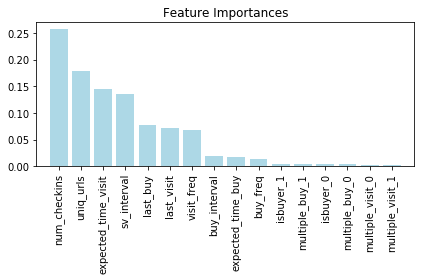

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(x_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(x_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

## 1.2 gridsearch+CV for optimal parameters

In [30]:
# find the best parameters of RF model by gridsearch
#let's drink a coffee
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
               'n_estimators': [180,200,220],
              'max_features':[0.9,0.93,0.96]
             }

rf = RandomForestClassifier()
rfc = GridSearchCV(rf, param_grid, scoring = 'neg_log_loss', cv=5, n_jobs=2)
rfc.fit(x_train, y_train)
print(rfc.best_score_)
print(rfc.best_params_)

-0.07261218604204259
{'max_features': 0.93, 'n_estimators': 200}


## 1.3 Learning curve to show model performance

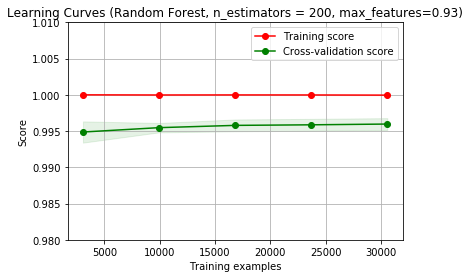

In [10]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# To check if our model is overfitting or not

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (Random Forest, n_estimators = 200, max_features=0.93)"
cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)
estimator = RandomForestClassifier(n_estimators = 200, max_features=0.93)
plot_learning_curve(estimator, title, x_train, y_train, (0.98, 1.01), cv=cv, n_jobs=4)

plt.show()

#### the gap between traing curve and validation curve is small which implies that the model is not overfitting.

## 1.4 Confusion matrix

In [98]:
# let's see how the confusion matrix looks like

from sklearn.metrics import confusion_matrix

RF = RandomForestClassifier(n_estimators=200, max_features=0.93)
RF.fit(x_train,y_train)
preds = RF.predict(x_train)
print('Confusion Matrix')
confusion_matrix(preds, y_train)

Confusion Matrix


array([[38041,     2],
       [    0,   166]], dtype=int64)

**<font color=red>RandomForest has good performance on learning curve as well as the confusion matrix results, though the data set is highly unbalanced.</font>**

## 1.5 ROC Curve plot

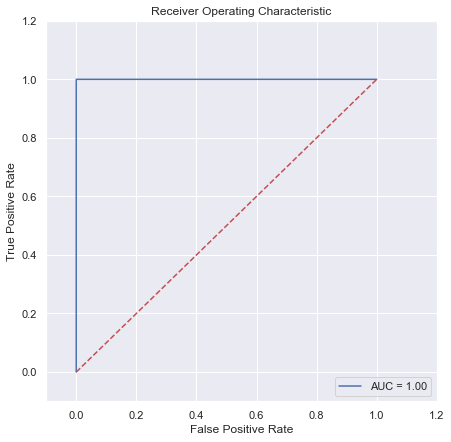

In [114]:
# Plot ROC curve and compute AUC
from sklearn.metrics import roc_curve, auc

def plot_roc(actual, predictions):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_roc(y_train,RF.predict_proba(x_train)[:,1])

# 2. Logistic Regression

## 2.1 Data scaling for fast convergence

In [139]:
# logistic regression would be inaccurate when our quantitative data has different scales.
# So the first thing is to re-scale the data.

# ["buy_freq","visit_freq","buy_interval","sv_interval","expected_time_buy",
# "expected_time_visit","last_buy","last_visit","uniq_urls","num_checkins"]

import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()

scale_feats = ["buy_freq","visit_freq","buy_interval","sv_interval","expected_time_buy","expected_time_visit",
               "last_buy","last_visit","uniq_urls","num_checkins"]

for feat in scale_feats:
    #Traing data
    scale = scaler.fit(np.array(train[feat]).reshape(-1,1))
    train[feat+'_scaled'] = scaler.fit_transform(np.array(train[feat]).reshape(-1,1), scale)
    #Testing data
    scale = scaler.fit(np.array(test[feat]).reshape(-1,1))
    test[feat+'_scaled'] = scaler.fit_transform(np.array(test[feat]).reshape(-1,1), scale)

train = train.drop(scale_feats, axis=1)
test = test.drop(scale_feats, axis=1)
train.head(5)

,y_buy,isbuyer_0,isbuyer_1,multiple_buy_0,multiple_buy_1,multiple_visit_0,multiple_visit_1,buy_freq_scaled,visit_freq_scaled,buy_interval_scaled,sv_interval_scaled,expected_time_buy_scaled,expected_time_visit_scaled,last_buy_scaled,last_visit_scaled,uniq_urls_scaled,num_checkins_scaled
0,0,1,0,1,0,1,0,-0.171555,-0.282756,-0.051195,-0.329860,0.036443,0.317806,0.778640,0.778640,1.330614,1.097796
1,0,1,0,1,0,1,0,-0.171555,-0.282756,-0.051195,-0.329860,0.036443,0.317806,-1.086072,-1.086072,1.023761,-0.139483
2,0,1,0,1,0,0,1,-0.171555,0.050819,-0.051195,-0.301636,0.036443,-2.868740,0.685404,0.685404,0.264704,-0.277132
3,0,1,0,1,0,1,0,-0.171555,-0.282756,-0.051195,-0.329860,0.036443,0.317806,-0.414776,-0.414776,-1.124208,-0.531431
4,0,1,0,1,0,0,1,-0.171555,0.384393,-0.051195,2.237327,0.036443,-0.757869,-0.004539,-0.004539,0.216254,-0.326903


In [140]:
#Get the traing data and testing data
y_train = train['y_buy'].values
x_train = train.drop(['y_buy'], axis=1).values

x_test = test.values

print("x_train shape:", x_train.shape,'\n','y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)

x_train shape: (38209, 16) 
 y_train shape: (38209,)
x_test shape: (16375, 16)


## 2.2 gridsearch+CV for optimal parameters

In [40]:
# Logistic Regression Model and GridSearch for best parameters

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
               'C': [0.1,0.2,0.3,0.4],
              'penalty':["l1","l2"]
             }

lr = LogisticRegression()
lrc = GridSearchCV(lr, param_grid, scoring = 'accuracy', cv=5, n_jobs=2)
lrc.fit(x_train, y_train)
print(lrc.best_score_)
print(lrc.best_params_)

C:\Users\Think\.julia\conda\3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9954984427752623
{'C': 0.1, 'penalty': 'l1'}


## 2.3 Feature selection using LASSO

C:\Users\Think\.julia\conda\3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.0, 'LASSO for feature selection')

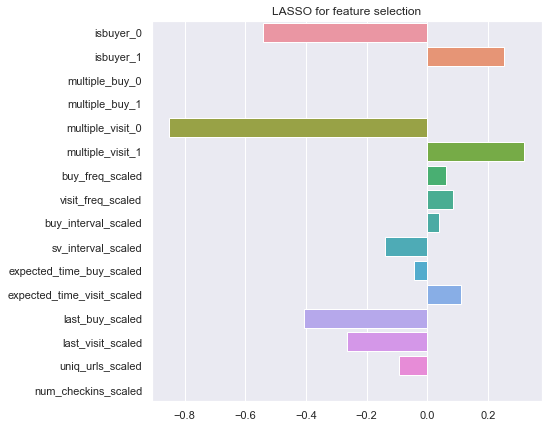

In [124]:
#By choosing the "l1" penalty(LASSO), the features that contribute less to the final results will have close to 0 weights.
import seaborn as sns
sns.set(rc={'figure.figsize':(7,7)})

LR = LogisticRegression(C=0.1, penalty='l1')
LR.fit(x_train,y_train)

feats = list(train.columns)
feats.pop(0)

ax = sns.barplot(LR.coef_[0],feats)
ax.set_title("LASSO for feature selection")

## 2.4 Confusion Matrix

In [122]:
# confusion matrix
preds = LR.predict(x_train)
confusion_matrix(preds, y_train)

array([[33051,   104],
       [ 4990,    64]], dtype=int64)

**<font color=red>Although LR achieved high classification accuracy of 0.995, due to the highly unbalanced data distribution, it could cause serious bias when fitting the model.</font>**

## 2.5 ROC Curve plot

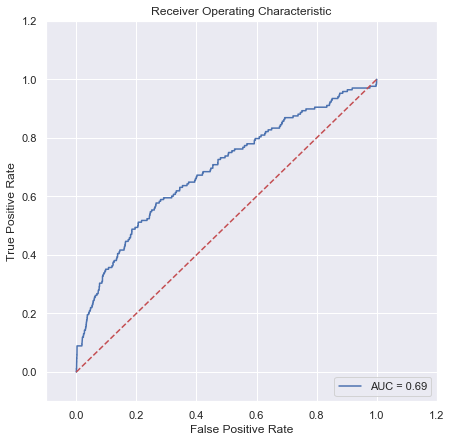

In [123]:
plot_roc(y_train, LR.predict_proba(x_train)[:,1])

# 4. XGboost

## 4.1 Build xgboost model

In [199]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics


def modelfit(alg, x_train, x_test, y_train, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(x_train, label=y_train)
        xgtest = xgb.DMatrix(x_test)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
             early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #fit model
    alg.fit(x_train, y_train, eval_metric='auc')
        
    #prediction on training data
    dtrain_predictions = alg.predict(x_train)
    dtrain_predprob = alg.predict_proba(x_train)[:,1]
        
    #output of detailed information
    print("\nbuilding model...")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))
    print("AUC on training set: %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    print("confusion matrix:\n")
    print(confusion_matrix(dtrain_predictions, y_train))

## 4.2 GridSeach

In [179]:
# GridSearch for optimal parameter: max_depth, min_child_weight
param_test1 = {
    'max_depth':[4,5,6],
    'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
                                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_train, y_train)

gsearch1.best_params_,gsearch1.best_score_

({'max_depth': 4, 'min_child_weight': 5}, 0.8564923889934348)

In [181]:
# GridSearch for optimal parameter: gamma
param_test2 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
                                        min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(x_train, y_train)

gsearch2.best_params_,gsearch2.best_score_

({'gamma': 0.0}, 0.8564923889934348)

In [182]:
# GridSearch for optimal parameter: subsample nad colsample_bytree
param_test3 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
                                        min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=5, missing=None, n_estimators=177,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [183]:
gsearch3.best_params_,gsearch3.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.8}, 0.8530825828874391)

In [184]:
# GridSearch for optimal parameter: reg_alpha
param_test4 = {
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
                                        min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(x_train,y_train)

gsearch4.best_params_,gsearch4.best_score_

({'reg_alpha': 0}, 0.8586206189155143)

## 4.3 Evaluate the Model performance 
**<font color=red>xgboost has bad performance classifying the minor data samples into true category.</font>**

In [200]:
xgbclf = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=4,
        min_child_weight=5,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgbclf, x_train, x_test, y_train)


building model...
Accuracy : 0.9956
AUC on training set: 0.571931
confusion matrix:

[[38041   168]
 [    0     0]]


# 5. Process with highly unbalanced data

**<font color=red>the statistical infomation below tells us that among 38041 data samples, we only have 168 positive data samples, which could greatly bias the classification results.</font>**

In [201]:
print("Number of negative samples: ",train.y_buy.value_counts()[0])
print("Number of positive samples: ",train.y_buy.value_counts()[1])
print("0:1 = ",221.1)

Number of negative samples:  38041
Number of positive samples:  168
0:1 =  221.1


**<font color=red>Normally, oversampling and undersampling are used to deal with such a problem.</font>**

![title](resampling.png)

## 5.1 navie random over-sampling
#### generate new samples by randomly sampling with replacement the current available samples.

In [202]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(x_train, y_train)

print('The number for each category:')
print(sorted(Counter(y_ros).items()))

The number for each category:
[(0, 38041), (1, 38041)]


## 5.2 Over-sampling using SMOTE and ADASYN

In [203]:
from imblearn.over_sampling import SMOTE, ADASYN

X_SMOTE, y_SMOTE = SMOTE().fit_resample(x_train, y_train)
print('SMOTE sampling rsults:')
print(sorted(Counter(y_SMOTE).items()))


X_ADASYN, y_ADASYN = ADASYN().fit_resample(x_train, y_train)
print('ADASYN sampling results:')
print(sorted(Counter(y_ADASYN).items()))

SMOTE sampling rsults:
[(0, 38041), (1, 38041)]
ADASYN sampling results:
[(0, 38041), (1, 37964)]


## 5.3 Traing LR on new data set

In [97]:
param_grid = {
               'C': [0.04,0.08,0.12],
              'penalty':["l1","l2"]
             }

lr = LogisticRegression()


lrc1 = GridSearchCV(lr, param_grid, scoring = 'accuracy', cv=5, n_jobs=2)
lrc1.fit(X_ros, y_ros)
print('random over-sampling:')
print(lrc1.best_score_)
print(lrc1.best_params_)
print('-'*30)


lrc2 = GridSearchCV(lr, param_grid, scoring = 'accuracy', cv=5, n_jobs=2)
lrc2.fit(X_SMOTE, y_SMOTE)
print('SMOTE over-sampling:')
print(lrc2.best_score_)
print(lrc2.best_params_)
print('-'*30)


lrc3 = GridSearchCV(lr, param_grid, scoring = 'accuracy', cv=5, n_jobs=2)
lrc3.fit(X_ADASYN, y_ADASYN)
print('ADASYN over-sampling:')
print(lrc3.best_score_)
print(lrc3.best_params_)

print('Confusion matrix:')
print(confusion_matrix(lrc1.predict(X_ros),y_ros),'\n','-'*50,'\n',
     confusion_matrix(lrc2.predict(X_SMOTE),y_SMOTE),'\n','-'*50,'\n',
     confusion_matrix(lrc3.predict(X_ADASYN),y_ADASYN))

C:\Users\Think\.julia\conda\3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


random over-sampling:
0.7750979206645462
{'C': 0.04, 'penalty': 'l2'}
------------------------------


C:\Users\Think\.julia\conda\3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SMOTE over-sampling:
0.8163560369075471
{'C': 0.04, 'penalty': 'l2'}
------------------------------


C:\Users\Think\.julia\conda\3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ADASYN over-sampling:
0.8155384514176699
{'C': 0.04, 'penalty': 'l2'}
Confusion matrix:
[[32139 11211]
 [ 5902 26830]] 
 -------------------------------------------------- 
 [[32640  8516]
 [ 5401 29525]] 
 -------------------------------------------------- 
 [[32612  8455]
 [ 5429 29509]]


## 5.4 Training RF again on new data set with SMOTE over-sampling

In [49]:
param_grid = {
               'n_estimators': [180,200,220],
              'max_features':[0.9,0.93,0.96]
             }

rf = RandomForestClassifier()
rfc_SMOTE = GridSearchCV(rf, param_grid, scoring = 'accuracy', cv=5, n_jobs=2)
rfc_SMOTE.fit(X_SMOTE, y_SMOTE)
print(rfc_SMOTE.best_score_)
print(rfc_SMOTE.best_params_)

0.9937034992244393
{'max_features': 0.93, 'n_estimators': 220}


In [51]:
confusion_matrix(rfc_SMOTE.predict(X_SMOTE),y_SMOTE)

array([[38036,     1],
       [    1, 38036]], dtype=int64)

## 5.5 Traing xgboost on new data set with SMOTE over-sampling

In [204]:
xgbclf_ = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=4,
        min_child_weight=5,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)

modelfit(xgbclf_, X_SMOTE, x_test, y_SMOTE)


building model...
Accuracy : 0.9978
AUC on training set: 0.999894
confusion matrix:

[[38026   153]
 [   15 37888]]


# 6. Submission
**<font color=red>By looking at the output of these three model, we finally choose RandomForest as the final model for predicting the test data set.</font>**

#### Final model: random forest trained on SMOTE data set(rfc_SMOTE)
#### Parameter: "max_features:" 0.93     "n_estimators:" 220

In [68]:
y_test = rfc_SMOTE.predict_proba(x_test)

df = pd.DataFrame({"y_preds": y_test[:,1]})
df.to_csv("submission.csv", index=True)